In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uncovering-factors-that-affect-used-car-prices/autos.csv


# Arabalar veri seti üzerinde Analiz yapılması

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

#veriyi içe aktarma
data =pd.read_csv("/kaggle/input/uncovering-factors-that-affect-used-car-prices/autos.csv")
data.head(10)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,...,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,...,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,...,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [36]:
data= data.drop(["index","nrOfPictures"], axis=1)
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [37]:
#veri tipinin dönüştürülmesi
data['dateCrawled'] = pd.to_datetime(data['dateCrawled']) 
data['dateCreated'] = pd.to_datetime(data['dateCreated'])
data['lastSeen'] = pd.to_datetime(data['lastSeen'])

### ***Tekrar eden değerlerin gösterilmesi***

In [38]:
print("tekrar eden:",data.duplicated().sum())
table= pd.DataFrame({
    'Unique':data.nunique(),
    'Null':data.isnull().sum()
})
display(table)

tekrar eden: 4


,Unique,Null
dateCrawled,280500,0
name,233531,0
seller,2,0
offerType,2,0
price,5597,0
abtest,2,0
vehicleType,8,37869
yearOfRegistration,155,0
gearbox,2,20209
powerPS,794,0


In [39]:
data = data.drop_duplicates()
print("tekrar eden değer:", data.duplicated().sum())

tekrar eden değer: 0


# En yaygın değerler ile doldurma yapılmaktadır.

In [40]:
most_common = data["notRepairedDamage"].value_counts(ascending=False).index[0]
data["notRepairedDamage"].fillna(most_common, inplace=True)

In [41]:
most_common = data["vehicleType"].value_counts(ascending=False).index[0]
data["vehicleType"].fillna(most_common, inplace=True)

most_common = data["fuelType"].value_counts(ascending=False).index[0]
data["fuelType"].fillna(most_common, inplace=True)

most_common = data["notRepairedDamage"].value_counts(ascending=False).index[0]
data["notRepairedDamage"].fillna(most_common, inplace=True)

most_common = data["gearbox"].value_counts(ascending=False).index[0]
data["gearbox"].fillna(most_common, inplace=True)

data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType                0
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

In [42]:
model_counts = data['price'].value_counts()
print(model_counts)

price
0         10778
500        5670
1500       5394
1000       4648
1200       4594
          ...  
349000        1
8889          1
3440          1
1997          1
10985         1
Name: count, Length: 5597, dtype: int64


In [43]:
# öncelikli olarak bar grafiğini elde edeceğimiz metodumuzu yazalım.
def plotBar(degisken,n = 13):
    """
        Girdi: Değişken/sütun ismi
               n = en önemli 10 eşsiz değer
        Çıktı: Bar grafiği
    """
    data_ = data[degisken]
    datacounts = data_.value_counts()
    datacounts = datacounts [:n]
    plt.figure()
    plt.bar(datacounts .index, datacounts , color = "orange")
    plt.xticks(datacounts.index, datacounts.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, datacounts))

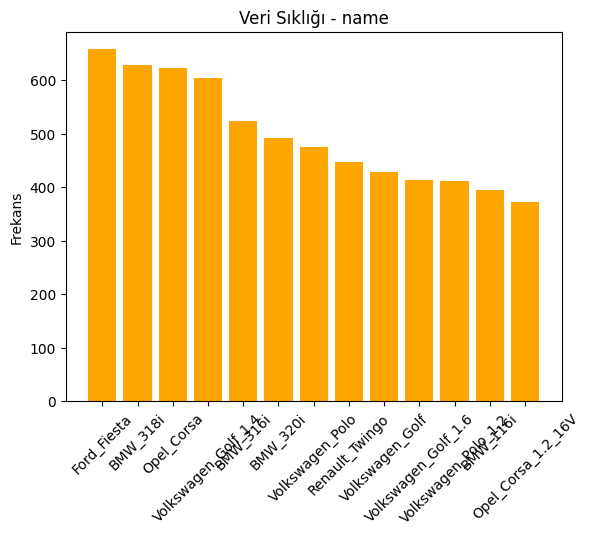

name: 
 name
Ford_Fiesta            657
BMW_318i               627
Opel_Corsa             622
Volkswagen_Golf_1.4    603
BMW_316i               523
BMW_320i               492
Volkswagen_Polo        475
Renault_Twingo         447
Volkswagen_Golf        428
Volkswagen_Golf_1.6    413
Volkswagen_Polo_1.2    412
BMW_116i               394
Opel_Corsa_1.2_16V     373
Name: count, dtype: int64


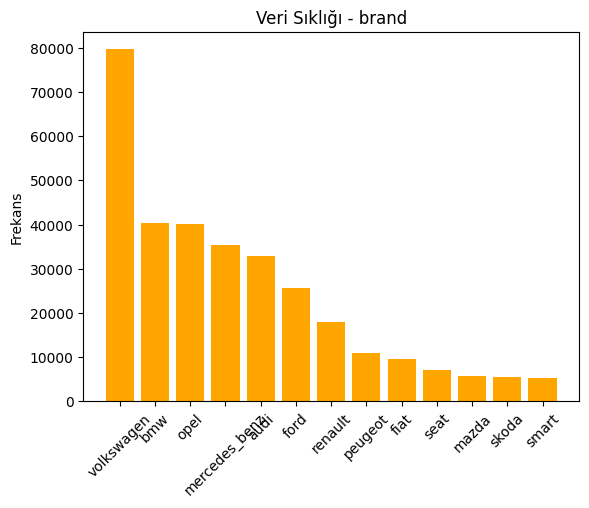

brand: 
 brand
volkswagen       79639
bmw              40274
opel             40136
mercedes_benz    35307
audi             32873
ford             25573
renault          17969
peugeot          11027
fiat              9676
seat              7022
mazda             5695
skoda             5641
smart             5249
Name: count, dtype: int64


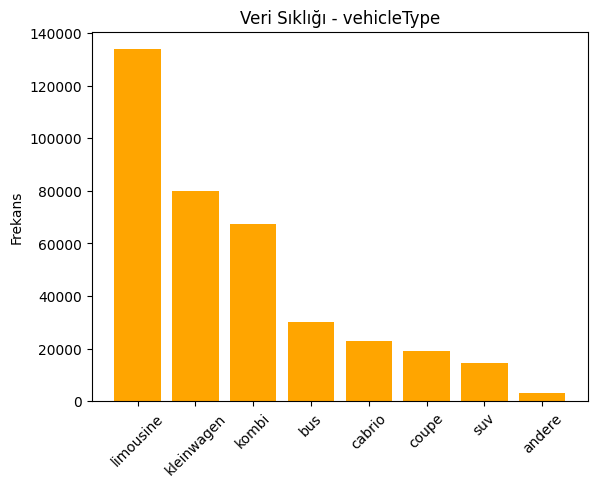

vehicleType: 
 vehicleType
limousine     133763
kleinwagen     80022
kombi          67563
bus            30201
cabrio         22898
coupe          19013
suv            14707
andere          3357
Name: count, dtype: int64


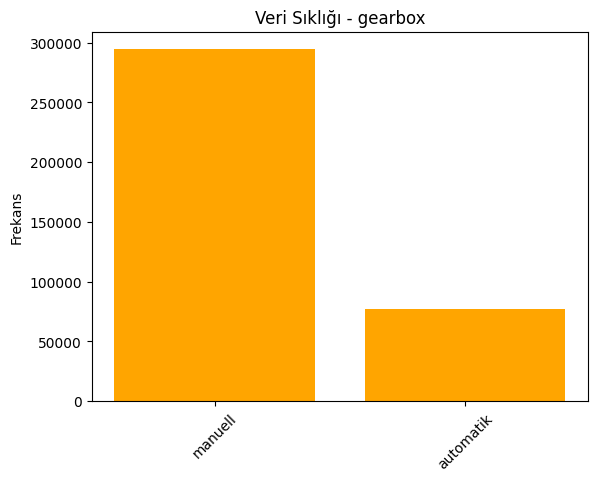

gearbox: 
 gearbox
manuell      294421
automatik     77103
Name: count, dtype: int64


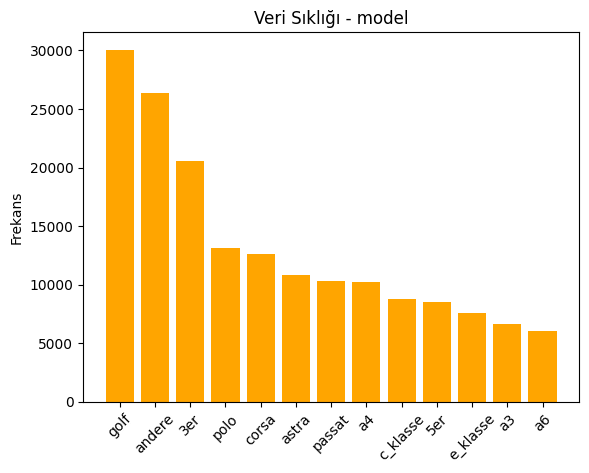

model: 
 model
golf        30070
andere      26399
3er         20567
polo        13092
corsa       12573
astra       10830
passat      10305
a4          10257
c_klasse     8775
5er          8546
e_klasse     7561
a3           6604
a6           6023
Name: count, dtype: int64


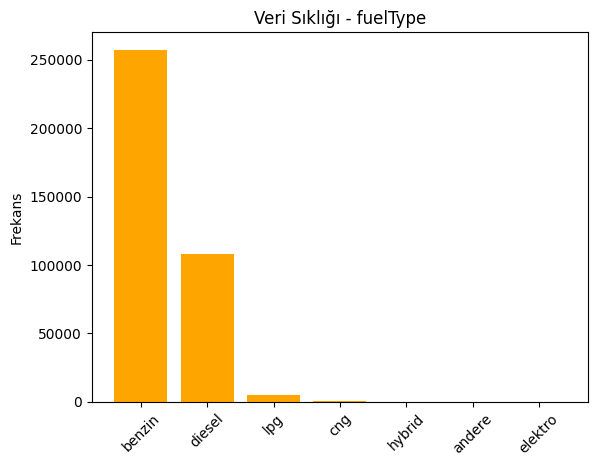

fuelType: 
 fuelType
benzin     257240
diesel     107745
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: count, dtype: int64


In [44]:
# sayısal değişkenler için histogram çizdirelim
kategorik_degisken = ["name","brand","vehicleType","gearbox","model","fuelType"]
for i in kategorik_degisken:
    plotBar(i)

## Araçlardan en cok Ford_Fiesta  isimli, volkswagen marka,golf model manuel araç ve yakıt türü olarak benzin kullanılmaktadır.

In [45]:
import pandas as pd

top_brands = data['brand'].value_counts().nlargest(3)

models_df = pd.DataFrame()
for brand in top_brands.index:
    models_df[brand] = data[data['brand'] == brand]['model'].value_counts()

Text(0.5, 1.0, 'lada markasının modelleri')

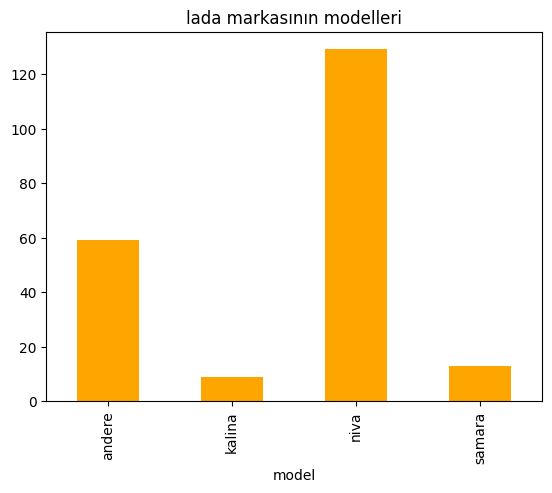

In [46]:
for brand in data['brand'].unique():
    df_brand = data.loc[data.brand == brand]
    model_counts = df_brand.groupby('model').size()

plt.figure()
model_counts.plot(kind='bar',color = "orange")
plt.title(f'{brand} markasının modelleri')

# Hasar durumuna göre ücret grafigi

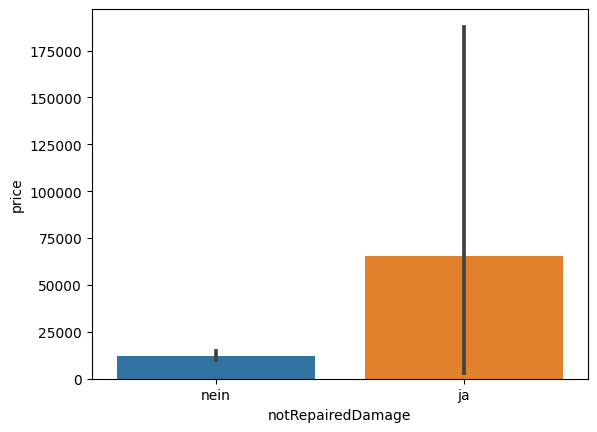

In [47]:
sns.barplot(x='notRepairedDamage', y='price', data=data, estimator=np.mean)
plt.show()

In [ ]:
useless_col = ["lastSeen", "dateCrawled", "name", "monthOfRegistration",
               "dateCreated", "postalCode", "seller", "offerType"]
new_car = data.drop(useless_col, axis=1)
new_car

In [ ]:
from sklearn import preprocessing
categorical_features = ['vehicleType', 'fuelType', 'brand', 
                        'model', 'abtest', 'notRepairedDamage', 'gearbox']
l =preprocessing.LabelEncoder()

for categorical_feature in categorical_features:
    new_car[categorical_feature] = l.fit_transform(new_car[categorical_feature])

new_car.head()

# Korelasyon haritası

In [ ]:
new_car.corr()

# Isı Haritası

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.clustermap(new_car.corr(), cmap="vlag", dendrogram_ratio = (0.1,0.2), annot =True, linewidths= .8,figsize=(9,10))
plt.show()

In [ ]:
from sklearn.model_selection  import  train_test_split
X = new_car["model"]
y = new_car["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [ ]:
 #liner regresyon modelini inşa edelim 
from sklearn.linear_model import LinearRegression 
 
liner_model = LinearRegression() 

In [ ]:
# x_trainden y_traini öğrenelim. 
 
liner_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1)) 

In [ ]:
prediction = liner_model.predict(X_test.values.reshape(-1,1)) 
print(prediction) 

In [ ]:
import matplotlib.pyplot as plt 
# verileri görselleştirme 
 
x_train = X_train.sort_index() 
y_train = y_train.sort_index() 
  
#Grafik çizme 
plt.plot(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1)) 
plt.plot(X_test.values.reshape(-1,1),prediction) 
  
#Grafik başlığı,x ve y için etiket oluşturma 
plt.title("hasar durumuna Göre Fiyat") 
plt.xlabel("Hasar") 
plt.ylabel("Fiyat") 

In [ ]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
 
print("Lineer R2 değeri:")
print(r2_score(y_test.values.reshape(-1,1),prediction)) 

print("MSE değeri:")
print(mean_squared_error(y_test.values.reshape(-1,1),prediction)) 

# Gözetimsiz Ögrenme

In [ ]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters=2) 
model.fit(new_car) 
model.labels_

In [ ]:
 # grafik cizdirme 
import numpy as np 
import matplotlib.pyplot as plt 
 
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64) 
plt.figure(figsize=(14,7)) 
colormap = np.array(['red', 'blue']) 
 
plt.subplot(1, 2, 1) 
plt.scatter(new_car.brand,new_car.model, c=colormap[predY], s=40) 
plt.title('K-means Kümeleme') 

In [ ]:
# grafik cizdirme 
import numpy as np 
import matplotlib.pyplot as plt 
 
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64) 
plt.figure(figsize=(14,7)) 
colormap = np.array(['red', 'blue']) 
 
plt.subplot(1, 2, 1) 
plt.scatter(new_car.price,new_car.powerPS, c=colormap[predY], s=40) 
plt.title('K-means Kümeleme') 